In [11]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

snv_data = read.table(file = '../../data/snv-data/for_use/moderate_frequency.tsv.gz', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(snv_data))) {
    snv_data[,i] <- as.logical(snv_data[,i])
}

head(snv_data)

,SRR10903401,SRR10903402,SRR10971381,SRR11059940,SRR11059942,SRR11059943,SRR11059944,SRR11059945,SRR11059946,SRR11059947,⋯,SRR11409417,SRR11410528,SRR11410529,SRR11410532,SRR11410533,SRR11410536,SRR11410538,SRR11410540,SRR11410541,SRR11410542
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
NC_045512:A:10024:T,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:10435:T,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:10773:C,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:10987:T,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:11367:T,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:11849:G,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [21]:
snv1 <- nrow(snv_data[snv_data['SRR11059942'] == TRUE,])
snv2 <- nrow(snv_data[snv_data['SRR11410529'] == TRUE,])
total <- nrow(snv_data)
print(sprintf("SRR11059942 %s (%0.2f)", snv1, snv1/total))
print(sprintf("SRR11410529 %s (%0.2f)", snv2, snv2/total))

[1] "SRR11059942 103 (0.24)"
[1] "SRR11410529 9 (0.02)"


# Convert data frame to binary transaction matrix

In [2]:
snv_data_transactions <- as(snv_data, "transactions")
summary(snv_data_transactions)

transactions as itemMatrix in sparse format with
 437 rows (elements/itemsets/transactions) and
 41 columns (items) and a density of 0.0302506 

most frequent items:
SRR11059942 SRR11397719 SRR11059946 SRR11059943 SRR11059945     (Other) 
        103          70          40          34          30         265 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   6   8   9  10 
398  19   5   5   6   2   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.24    1.00   10.00 

includes extended item information - examples:
       labels   variables levels
1 SRR10903401 SRR10903401   TRUE
2 SRR10903402 SRR10903402   TRUE
3 SRR10971381 SRR10971381   TRUE

includes extended transaction information - examples:
        transactionID
1 NC_045512:A:10024:T
2 NC_045512:A:10435:T
3 NC_045512:A:10773:C

In [3]:
f <- itemFrequency(snv_data_transactions)
summary(f)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002288 0.006865 0.016018 0.030251 0.032037 0.235698 

pdf 
  3

png 
  2

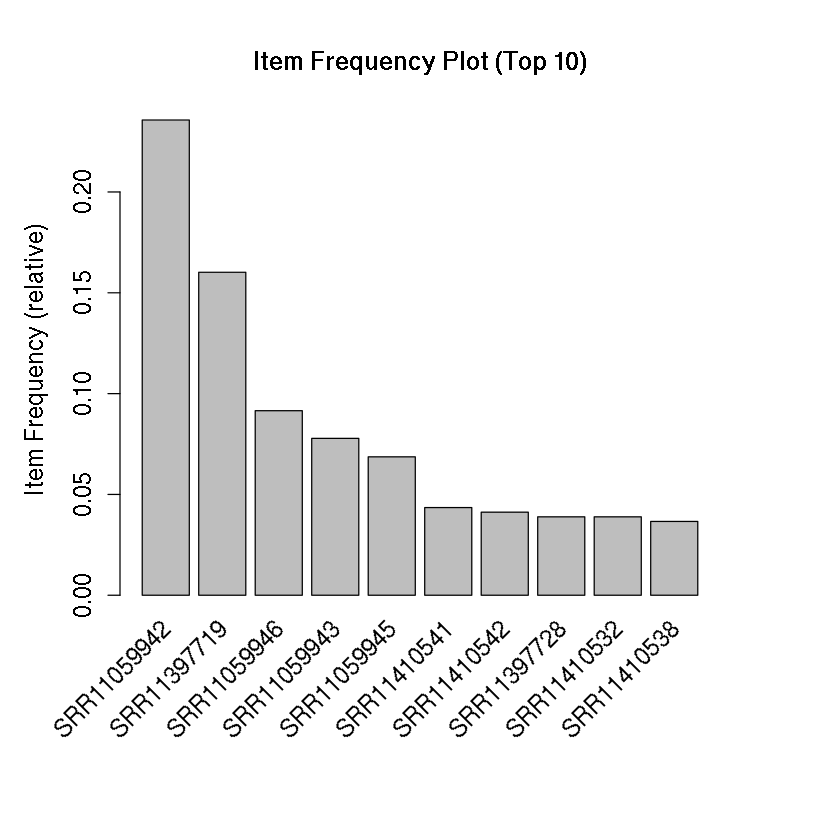

In [19]:
arules::itemFrequencyPlot(items(snv_data_transactions),
    topN=10,
    cex.axis=1.3,
    cex.names=1.3,
    cex.lab=1.3,
    cex.main=1.3,
    support=0.02,
    main='Item Frequency Plot (Top 10)',
    type="relative",
    ylab="Item Frequency (relative)",
    names=TRUE,
    mai=c(2,1,1,1))
dev.copy(pdf, "snv-item-frequency.pdf")
dev.off()

# Mine rules/itemsets

In [5]:
snv_rules <- apriori(snv_data_transactions, parameter=list(support=0.01, confidence=0.5, target="rules"))
snv_rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[41 item(s), 437 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [31 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 31 rules 

Itemsets in Antecedent (LHS)
 [1] "{SRR11410532,SRR11410533,SRR11410536}"
 [2] "{SRR11410532,SRR11410536}"            
 [3] "{SRR11410532,SRR11410533}"            
 [4] "{SRR11397720,SRR11410532,SRR11410536}"
 [5] "{SRR11410533,SRR11410536}"            
 [6] "{SRR11397714,SRR11410528}"            
 [7] "{SRR11397714,SRR11410529}"            
 [8] "{SRR11397720,SRR11410532}"            
 [9] "{SRR11397720,SRR11410536}"            
[10] "{SRR11397720,SRR11410532,SRR11410533}"
[11] "{SRR11410528}"                        
[12] "{SRR11410529}"                        
[13] "{SRR11410528,SRR11410529}"            
[14] "{SRR11397720}"                        
[15] "{SRR11397720,SRR11410533}"            
[16] "{SRR11397714}"                        
[17] "{SRR11410533}"                        
[18] "{SRR11397720,SRR11410533,SRR11410536}"
Itemsets in Consequent (RHS)
[1] "{SRR11410532}" "{SRR11397714}" "{SRR11410536}" "{SRR11410528}"
[5] "{SRR11410529}" "{SRR11410533}" "{SRR11397720}"


pdf 
  3

png 
  2

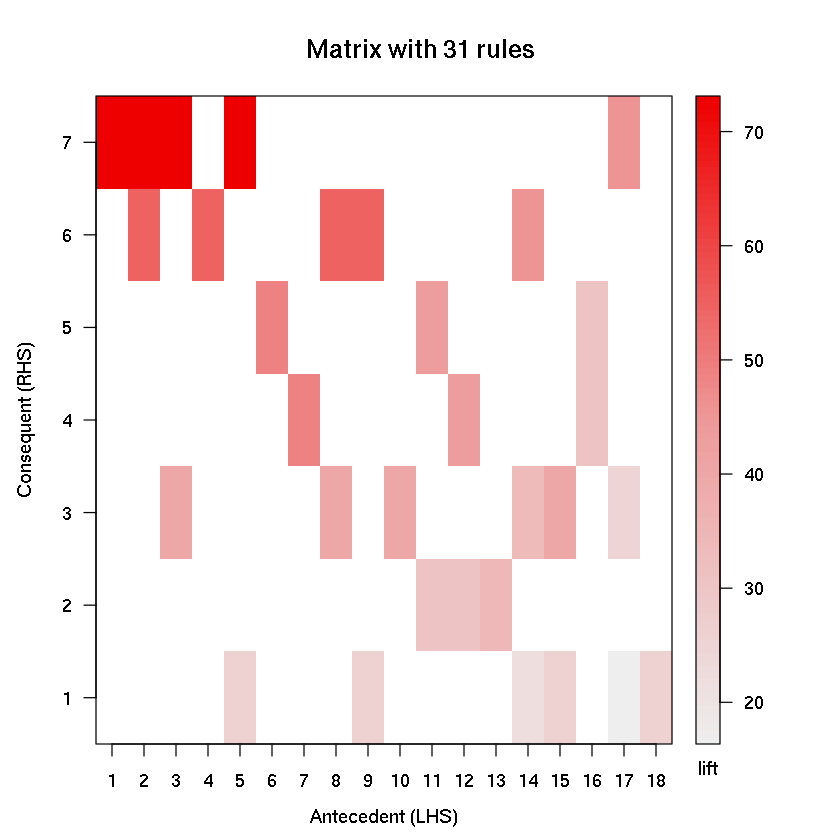

In [6]:
plot(snv_rules, method="matrix", measure="lift")
dev.copy(pdf, "snv-matrix.pdf")
dev.off()

pdf 
  3

png 
  2

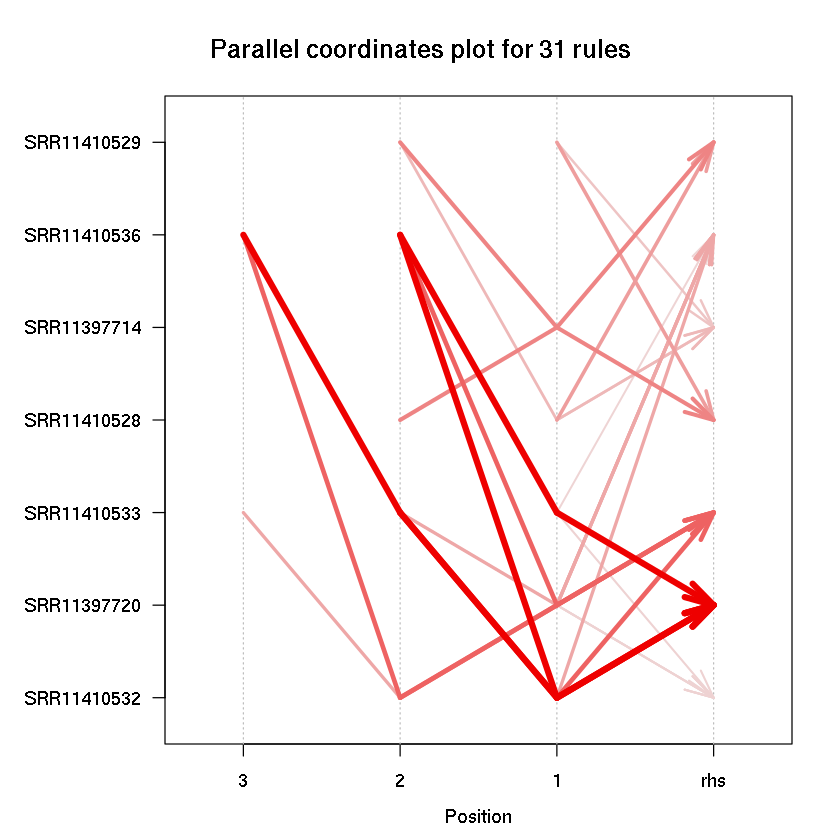

In [7]:
plot(snv_rules, method="paracoord", control=list(reorder=TRUE), measure="lift")
dev.copy(pdf, "snv-paracoord.pdf")
dev.off()

# Graph rules

pdf 
  3

png 
  2

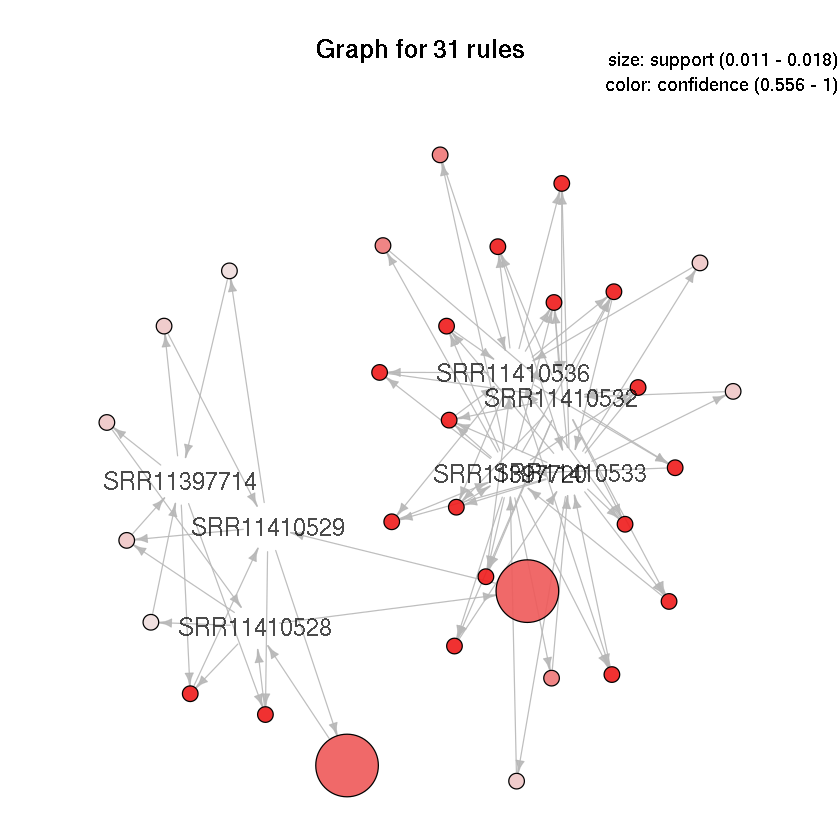

In [8]:
set.seed(19)
plot(snv_rules, method="graph", cex=1.3, measure="support", shading="confidence", alpha=0.9,
    control=list(layout=igraph::with_graphopt(spring.const=0.3, mass=50)))
dev.copy(pdf, "snv-moderate-rules.pdf")
dev.off()

# Interactive viz

## Confidence

In [9]:
set.seed(11)
p <- plot(snv_rules, method="graph", measure="support", shading="confidence", engine="htmlwidget")
htmlwidgets::saveWidget(p, "snv-rules-confidence.html", title="Rules generated from COVID-19 single nucleotide variants",
                        selfcontained = TRUE)

## Lift

In [12]:
set.seed(11)
p <- plot(snv_rules, method="graph", measure="support", shading="lift", engine="htmlwidget")
htmlwidgets::saveWidget(p, "snv-rules-lift.html", title="Rules generated from COVID-19 single nucleotide variants",
                        selfcontained = TRUE)